# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.382  1  0.668 0.415 0.003   
                             age        0.013  1  0.023 0.880 0.000   
                             Kiel       1.664  1  2.913 0.090 0.015   
                             Magdeburg  5.012  1  8.771 0.003 0.044   
                             Sweden     8.040  1 14.071 0.000 0.069   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.266  1  1.453 0.229 0.008   
                             age        0.660  1  0.758 0.385 0.004   
                             Kiel       0.051  1  0.059 0.809 0.000   
                             Magdeburg  0.944  1  1.084 0.299 0.006   
                             Sweden    14.506  1 16.657 0.000 0.080   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.382  0.573    False  
                             age               0.056  0.933    False  
                             Kiel              1.048  0.192    False  
                             Magdeburg         2.462  0.014     True  
                             Sweden            3.632  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.639  0.382    False  
                             age               0.415  0.546    False  
                             Kiel              0.092  0.888    False  
                             Magdeburg         0.524  0.459    False  
                             Sweden            4.182  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.738  1  4.588 0.033 0.023   
                             age        0.017  1  0.107 0.744 0.001   
                             Kiel       0.450  1  2.797 0.096 0.014   
                             Magdeburg  0.934  1  5.807 0.017 0.030   
                             Sweden     2.378  1 14.789 0.000 0.072   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         7.720  1  3.467 0.064 0.018   
                             age        0.004  1  0.002 0.968 0.000   
                             Kiel       9.320  1  4.186 0.042 0.021   
                             Magdeburg 29.717  1 13.346 0.000 0.065   
                             Sweden     0.602  1  0.270 0.604 0.001   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.475  0.083    False  
                             age               0.129  0.830    False  
                             Kiel              1.017  0.190    False  
                             Magdeburg         1.772  0.048     True  
                             Sweden            3.786  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.193  0.139    False  
                             age               0.014  0.981    False  
                             Kiel              1.375  0.099    False  
                             Magdeburg         3.476  0.002     True  
                             Sweden            0.219  0.723    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.415         0.382  0.573    False   
                             Kiel      0.090         1.048  0.192    False   
                             Magdeburg 0.003         2.462  0.014     True   
                             Sweden    0.000         3.632  0.001     True   
                             age       0.880         0.056  0.933    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.229         0.639  0.382    False   
                             Kiel      0.809         0.092  0.888    False   
                             Magdeburg 0.299         0.524  0.459    False   
                             Sweden    0.000         4.182  0.000     True   
                             age       0.385         0.415  0.546    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.033         1.475  0.083    False  
                             Kiel      0.096         1.017  0.190    False  
                             Magdeburg 0.017         1.772  0.048     True  
                             Sweden    0.000         3.786  0.001     True  
                             age       0.744         0.129  0.830    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.064         1.193  0.139    False  
                             Kiel      0.042         1.375  0.099    False  
                             Magdeburg 0.000         3.476  0.002     True  
                             Sweden    0.604         0.219  0.723    False  
                             age       0.968         0.014  0.981    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.486     0.337     0.244         2.737     0.310
std       0.303         5.375     0.331     0.298         5.153     0.325
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.004         0.339     0.015     0.002         0.361     0.008
50%       0.122         0.913     0.245     0.090         1.046     0.180
75%       0.458         2.432     0.610     0.435         2.714     0.580
max       0.998       148.314     0.998     1.000        83.049     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_50852/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.415         0.382   
A0A024R0T9;K7ER74;P02655                           AD     0.048         1.320   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.062         1.206   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.523         0.282   
A0A075B6H7                                         AD     0.147         0.832   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.110         0.959   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.305         0.516   
S4R3U6                                             AD     0.229         0.639   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.573    False   
A0A024R0T9;K7ER74;P02655                           AD      0.117    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.145    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.668    False   
A0A075B6H7                                         AD      0.279    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.226    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.465    False   
S4R3U6                                             AD      0.382    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.033         1.475   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.489   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.231         0.637   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.301         0.521   
A0A075B6H7                                         AD     0.049         1.310   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.093         1.033   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.572         0.243   
S4R3U6                                             AD     0.064         1.193   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.083    False  
A0A024R0T9;K7ER74;P02655                           AD      0.081    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.370    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.450    False  
A0A075B6H7                                         AD      0.112    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.405     0.338     0.249         1.490     0.320
std       0.292         1.644     0.317     0.292         1.768     0.316
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.011         0.360     0.037     0.010         0.362     0.030
50%       0.132         0.878     0.260     0.104         0.985     0.202
75%       0.437         1.945     0.594     0.435         2.019     0.580
max       0.998        22.800     0.998     0.999        24.584     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1030,989


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.415         0.382  0.573   
A0A024R0T9;K7ER74;P02655                           0.048         1.320  0.117   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.062         1.206  0.145   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.523         0.282  0.668   
A0A075B6H7                                         0.147         0.832  0.279   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.110         0.959  0.226   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.305         0.516  0.465   
S4R3U6                                             0.229         0.639  0.382   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.033   
A0A024R0T9;K7ER74;P02655                              False 0.032   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.231   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.301   
A0A075B6H7                                            False 0.049   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.093   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.572   
S4R3U6                                                False 0.064   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.475  0.083   
A0A024R0T9;K7ER74;P02655                                   1.489  0.081   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.637  0.370   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.521  0.450   
A0A075B6H7                                                 1.310  0.112   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.301   
Q9Y6X5                                                     1.033  0.185   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.170   
Q9Y6Y9                                                     0.243  0.697   
S4R3U6                                                     1.193  0.139   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    957
PI (yes) - QRILC (yes)   359
PI (no)  - QRILC (yes)    73
PI (yes) - QRILC (no)     32
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_50852/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A075B6I0                               0.020         1.706  0.059    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2    0.001         2.931  0.006     True   
A0A087WWT2;Q9NPD7                        0.040         1.395  0.103    False   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.006         2.237  0.021     True   
A0A087X1G7;A0A0B4J1S4;O60613             0.031         1.508  0.084    False   
...                                        ...           ...    ...      ...   
Q9NUQ9                                   0.220         0.658  0.371    False   
Q9NYX4                                   0.031         1.515  0.083    False   
Q9P0K9                                   0.029         1.543  0.079    False   
Q9UNW1                                   0.008         2.118  0.027     True   
Q9UQ52                                   0.082         1.088  0.179    False   

                                         QRILC                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A075B6I0                               0.004         2.432  0.014     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2    0.178         0.750  0.304    False   
A0A087WWT2;Q9NPD7                        0.004         2.380  0.015     True   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.081         1.092  0.165    False   
A0A087X1G7;A0A0B4J1S4;O60613             0.017         1.765  0.048     True   
...                                        ...           ...    ...      ...   
Q9NUQ9                                   0.011         1.964  0.033     True   
Q9NYX4                                   0.007         2.148  0.023     True   
Q9P0K9                                   0.009         2.039  0.029     True   
Q9UNW1                                   0.160         0.795  0.281    False   
Q9UQ52                                   0.011         1.973  0.032     True   

                                              data  
                                         frequency  
protein groups                                      
A0A075B6I0                                     194  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2          114  
A0A087WWT2;Q9NPD7                              193  
A0A087X152;D6RE16;E0CX15;O95185;O95185-2       176  
A0A087X1G7;A0A0B4J1S4;O60613                   184  
...                                            ...  
Q9NUQ9                                         114  
Q9NYX4                                         195  
Q9P0K9                                         192  
Q9UNW1                                         171  
Q9UQ52                                         188  

[105 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.573,0.083,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.117,0.081,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.145,0.370,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.668,0.450,196,PI (no) - QRILC (no)
A0A075B6H7,0.279,0.112,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.301,197,PI (no) - QRILC (no)
Q9Y6X5,0.226,0.185,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.170,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.793,0.008,86,PI (no) - QRILC (yes),0.784
Q8NCH0,0.645,0.031,113,PI (no) - QRILC (yes),0.614
E9PHN6;E9PHN7;F6XZQ7;P28161;P28161-2,0.028,0.629,120,PI (yes) - QRILC (no),0.602
A0A1W2PQ94;B4DS77;B4DS77-2;B4DS77-3,0.560,0.001,69,PI (no) - QRILC (yes),0.559
E5RK69;E7EMC6;P08133;P08133-2,0.018,0.501,80,PI (yes) - QRILC (no),0.483
...,...,...,...,...,...
Q16706,0.059,0.047,195,PI (no) - QRILC (yes),0.013
Q6UWH4;Q6UWH4-2,0.059,0.049,190,PI (no) - QRILC (yes),0.010
Q8N436,0.048,0.053,188,PI (yes) - QRILC (no),0.006


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


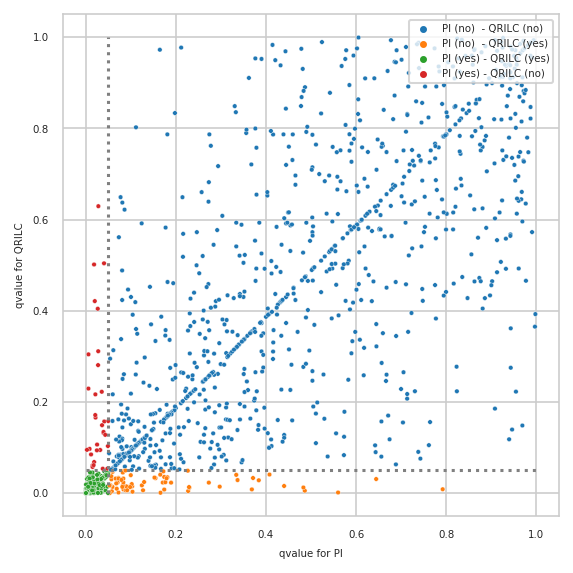

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


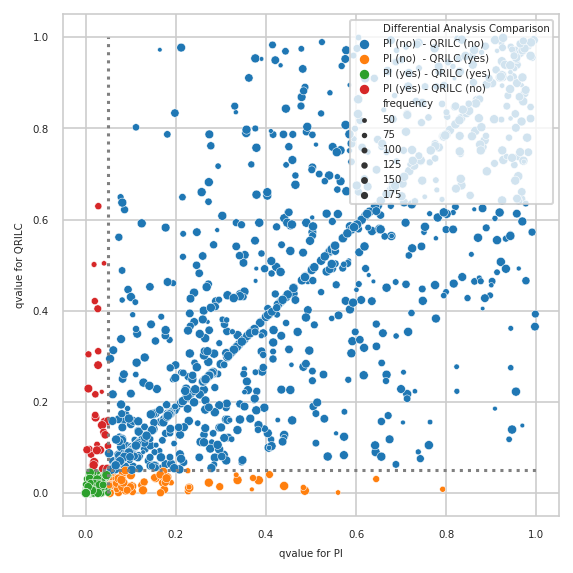

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
MAPT,ENSP00000340820,4.800
...,...,...
LPIN3,ENSP00000487971,0.681
HECTD1,ENSP00000382269,0.681
ETNK1,ENSP00000500633,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/9315d83d47168fa3da1739d7e683ad72_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out